In [1]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
df=pd.read_csv('data.csv')
print(df.head())
print(df.info())

Saving data.csv to data.csv
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Selecting features and target variable
selected_features = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
                     'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
                     'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                     'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
                     'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                     'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                     'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                     'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']

X = df[selected_features]
y = df['class']  # Assuming the target variable is 'class'

# Converting categorical features to numeric using one-hot encoding
X = pd.get_dummies(X)

# Display the first few rows to verify the data
print(X.head())


   duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  flag_REJ  flag_RSTO  \
0                  0          0                0  ...     False      False   
1                  0          0                0  ...     False      False   
2                  0          0                0  ...     False      False   
3                  0          1                0  ...     False      False   
4                  0          1                0  ...     False      False   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0        False      Fals

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(20153, 114) (5039, 114) (20153,) (5039,)


In [7]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Precision, Recall, F1-score
classification_report_result = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_report_result)


Accuracy: 1.00
Confusion Matrix:
[[2357    8]
 [   4 2670]]
Classification Report:
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2365
      normal       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [9]:
# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 4: Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [10]:
from sklearn.metrics import accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy as a percentage
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.76%


Training Accuracy: 100.00%
Test Accuracy: 99.76%


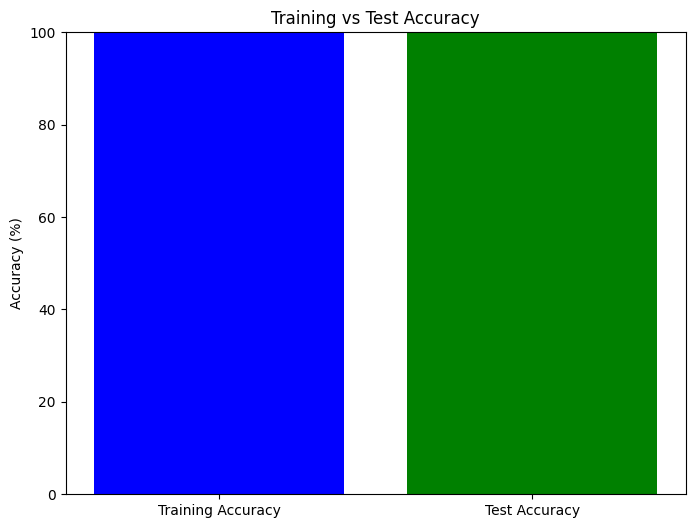

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Selecting features and target variable
selected_features = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
                     'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
                     'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                     'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
                     'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                     'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                     'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                     'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']

X = df[selected_features]
y = df['class']  # Replace 'class' with the actual column name for your target variable

# Converting categorical features to numeric using one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Bar plot to compare training and testing accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy * 100, test_accuracy * 100], color=['blue', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy')
plt.ylim(0, 100)
plt.show()
